# Exploratory Analysis - Coding Challenge
<hr style="border:2px solid black">

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive

- ⭐ Advanced Challenge: Try out to process the larger datasets



In [2]:
movies = pd.read_csv("data/ml-latest-small/movies.csv")
ratings = pd.read_csv("data/ml-latest-small/ratings.csv")

In [3]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


---
## Ratings table

#### How many unique users and movies are in the dataset?

In [4]:
unique_users = ratings["userId"].unique()
len(unique_users)

610

In [5]:
unique_movies = ratings["movieId"].unique()
len(unique_movies)

9724

#### What is the average rating

In [6]:
ratings["rating"].mean()

3.501556983616962

#### which rating appears the most?

In [7]:
ratings["rating"].mode()

0    4.0
Name: rating, dtype: float64

#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

In [8]:
rating_dist = ratings[["rating"]].value_counts().reset_index().sort_values("rating", ascending=False).copy()
rating_dist.columns = ["rating", "count"]
rating_dist["percent"] = rating_dist["count"] / rating_dist["count"].sum()
rating_dist.reset_index(drop=True, inplace=True)
rating_dist

,rating,count,percent
0,5.0,13211,0.131015
1,4.5,8551,0.084801
2,4.0,26818,0.265957
3,3.5,13136,0.130271
4,3.0,20047,0.198808
5,2.5,5550,0.055040
6,2.0,7551,0.074884
7,1.5,1791,0.017762
8,1.0,2811,0.027877
9,0.5,1370,0.013586


---
#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

In [9]:
ratings_by_user = (
    ratings.groupby("userId")[["rating"]].count().sort_values("rating", ascending=False)
)
ratings_by_user.columns = ["ratings_count"]
ratings_by_user

,ratings_count
userId,
414,2698
599,2478
474,2108
448,1864
274,1346
...,...
442,20
569,20
320,20


- How many users have rated more than 20 movies?

In [10]:
ratings_by_user[ratings_by_user["ratings_count"] > 20].count()

ratings_count    596
dtype: int64

- How many movies rated the user with the most/ least ratings?

In [11]:
ratings_by_user["ratings_count"].max()

2698

In [12]:
ratings_by_user["ratings_count"].min()

20

-  What is the *median* number of ratings?

In [13]:
ratings_by_user["ratings_count"].median()

70.5

- Draw a histogram or density plot of the distribution of the number of ratings per user! 

    - How would you characterize the distribution?
    - Hint: `sns.histplot()`

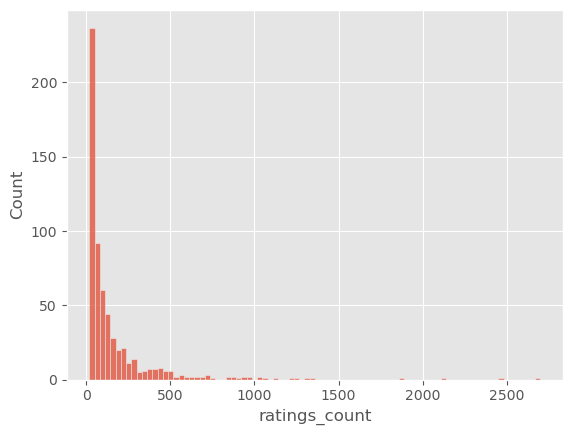

In [14]:
sns.histplot(ratings_by_user["ratings_count"]);

---
#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

In [15]:
mean_rating_by_user = ratings.groupby("userId")[["rating"]].mean().sort_values("rating", ascending=False)
mean_rating_by_user

,rating
userId,
53,5.000000
251,4.869565
515,4.846154
25,4.807692
30,4.735294
...,...
567,2.245455
153,2.217877
508,2.145833


- Which user gave the worst ratings on average, which user gave the best ratings?

In [16]:
# Worst average rating
mean_rating_by_user.head(1)

,rating
userId,
53,5.0


In [17]:
# Best average rating
mean_rating_by_user.tail(1)

,rating
userId,
442,1.275


- ⭐**Bonus**: Use your previous results and filter out users that have rated less than 20 movies! Do your results change?

In [18]:
ratings_by_user["ratings_count"].min()

20

**Answer:** There are no users that rated less than 20 movies, results are the same.

- Plot the distribution of average ratings! How would you characterize the distribution?

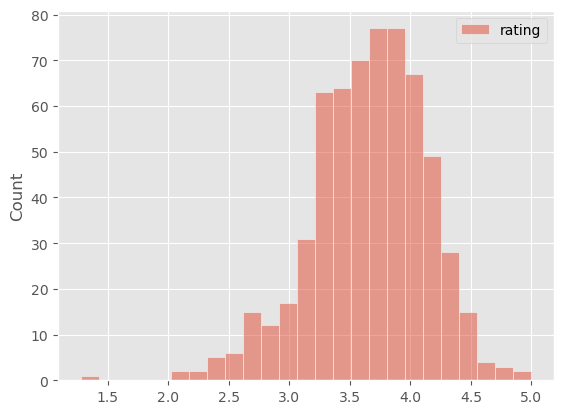

In [19]:
sns.histplot(mean_rating_by_user);

**Answer:** Looks like a normal distribution.

- ⭐**Bonus**: Are users who have given more ratings also stricter in their ratings?

    - Derive the correlation between the average rating and the number of ratings per user!
    - Draw a scatterplot of the user averages and number of ratings
    - Only consider users that have rated at least 10 movies

In [20]:
ratings_corr = ratings.groupby("userId")[["rating"]].agg(["count", "mean"])
ratings_corr["rating"]["count"].corr(ratings_corr["rating"]["mean"])

-0.1989972709982265

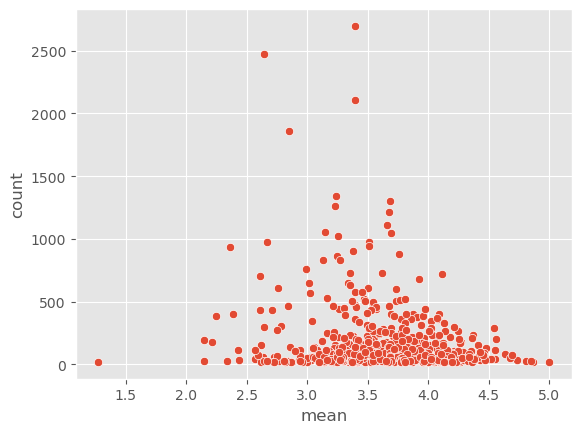

In [21]:
sns.scatterplot(x=ratings_corr["rating"]["mean"], y=ratings_corr["rating"]["count"]);

--- 
## Movies table

#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [22]:
movies[movies["title"].duplicated(keep=False)].sort_values("title")

,movieId,title,genres
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
650,838,Emma (1996),Comedy|Drama|Romance
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
9135,147002,Eros (2004),Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi


#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

In [23]:
missing_ids = movies[~movies["movieId"].isin(ratings["movieId"].unique())]
missing_ids

,movieId,title,genres
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller
2211,2939,Niagara (1953),Drama|Thriller
2499,3338,For All Mankind (1989),Documentary
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War
4037,5721,"Chosen, The (1981)",Drama
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance
4598,6849,Scrooge (1970),Drama|Fantasy|Musical
4704,7020,Proof (1991),Comedy|Drama|Romance
5020,7792,"Parallax View, The (1974)",Thriller


In [24]:
print(
    f"The movieIds {missing_ids['movieId'].to_list()} are missing from the ratings table."
)

The movieIds [1076, 2939, 3338, 3456, 4194, 5721, 6668, 6849, 7020, 7792, 8765, 25855, 26085, 30892, 32160, 32371, 34482, 85565] are missing from the ratings table.


#### ⭐ Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

In [25]:
movies["year"] = movies["title"].str.extract(r"\((\d{4})\)")
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


#### ⭐ Bonus: Split the genre column into a separate genre table

1. Use the `pandas.Series.str.split` method
2. Then use the `pandas.Series.explode` method to clean up the list entries
3. Which `movieId` has the most genres assigned?

In [26]:
genres = movies[["movieId", "genres"]].copy()
genres["genres"] = genres["genres"].apply(lambda x: x.split("|"))
genres.set_index("movieId", inplace=True)
genres = pd.DataFrame(genres["genres"].explode())

In [27]:
genres

,genres
movieId,
1,Adventure
1,Animation
1,Children
1,Comedy
1,Fantasy
...,...
193583,Fantasy
193585,Drama
193587,Action


---
## Ratings and movies table

#### Merge/join the ratings and movies tables together

- use the `movieId` as common key
- hint: `df.merge(...)`

In [28]:
df = movies.merge(ratings, left_on="movieId", right_on="movieId")
df

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483
...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,184,3.5,1537109545
100833,193585,Flint (2017),Drama,2017,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,184,3.5,1537110021


---
#### Count the number of ratings per movie title!

In [29]:
df_ratings_per_movie = (
    df.groupby("title")
    .agg(
        num_ratings=("rating", "count"),
        std=("rating", "std"),
        mean=("rating", "mean"),
    )
    .reset_index()
    .sort_values("num_ratings", ascending=False)
)
df_ratings_per_movie

,title,num_ratings,std,mean
3158,Forrest Gump (1994),329,0.831244,4.164134
7593,"Shawshank Redemption, The (1994)",317,0.713019,4.429022
6865,Pulp Fiction (1994),307,0.951997,4.197068
7680,"Silence of the Lambs, The (1991)",279,0.853983,4.161290
5512,"Matrix, The (1999)",278,0.975243,4.192446
...,...,...,...,...
4773,King Solomon's Mines (1950),1,NaN,3.000000
4772,King Solomon's Mines (1937),1,NaN,2.500000
4771,King Ralph (1991),1,NaN,1.500000
4769,King Kong Lives (1986),1,NaN,2.000000


- What are the top 10 most rated movies in the dataset?

In [30]:
df_ratings_per_movie.head(10)

,title,num_ratings,std,mean
3158,Forrest Gump (1994),329,0.831244,4.164134
7593,"Shawshank Redemption, The (1994)",317,0.713019,4.429022
6865,Pulp Fiction (1994),307,0.951997,4.197068
7680,"Silence of the Lambs, The (1991)",279,0.853983,4.161290
5512,"Matrix, The (1999)",278,0.975243,4.192446
8001,Star Wars: Episode IV - A New Hope (1977),251,0.872004,4.231076
4662,Jurassic Park (1993),238,0.855301,3.750000
1337,Braveheart (1995),237,0.967726,4.031646
8363,Terminator 2: Judgment Day (1991),224,0.926833,3.970982
7421,Schindler's List (1993),220,0.975996,4.225000


--- 
##### Which movies are most polarizing?

- For each movie, calculate the standard deviation divided by the average rating (This is called the [coefficient of variation](https://datacollection.jrc.ec.europa.eu/wordef/coefficient-of-variation))
- Filter out movies that have been rated by less than 100 users
- Look at the top 10 movies that have the highest coefficient of variation!
 

In [31]:
df_ratings_per_movie["var_coeff"] = (
    df_ratings_per_movie["std"] / df_ratings_per_movie["mean"]
)
df_ratings_per_movie[df_ratings_per_movie["num_ratings"] >= 100].sort_values(
    "var_coeff", ascending=False
).head(10)

,title,num_ratings,std,mean,var_coeff
675,Austin Powers: The Spy Who Shagged Me (1999),121,1.215318,3.198347,0.379983
2619,Dumb & Dumber (Dumb and Dumber) (1994),133,1.121480,3.060150,0.366479
7998,Star Wars: Episode I - The Phantom Menace (1999),140,1.121705,3.107143,0.361008
207,Ace Ventura: Pet Detective (1994),161,1.070886,3.040373,0.352222
6046,"Net, The (1995)",112,1.037882,3.040179,0.341389
3996,Home Alone (1990),116,0.992353,2.995690,0.331260
9298,Waterworld (1995),115,0.955733,2.913043,0.328087
3172,Four Weddings and a Funeral (1994),103,1.113470,3.519417,0.316379
9000,Twister (1996),123,1.048281,3.321138,0.315639
1857,Clueless (1995),104,1.037198,3.293269,0.314945


---

#### Calculate the average rating per movie title!

In [32]:
df_avg_by_title = df_ratings_per_movie.sort_values("mean", ascending=False)
df_avg_by_title

,title,num_ratings,std,mean,var_coeff
8121,Stuart Little 3: Call of the Wild (2005),1,NaN,5.0,NaN
5627,Mickey's Once Upon a Christmas (1999),1,NaN,5.0,NaN
5789,Moonlight,1,NaN,5.0,NaN
5796,More (1998),1,NaN,5.0,NaN
5809,Moscow Does Not Believe in Tears (Moskva sleza...,1,NaN,5.0,NaN
...,...,...,...,...,...
7868,Sorrow (2015),1,NaN,0.5,NaN
8579,The Pumaman (1980),1,NaN,0.5,NaN
4617,Journey 2: The Mysterious Island (2012),1,NaN,0.5,NaN
9282,"Wasp Woman, The (1959)",1,NaN,0.5,NaN


- Make a visualization of the distribution of average ratings per movie

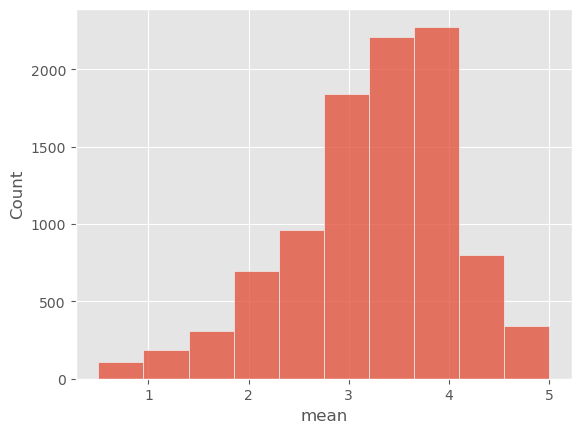

In [33]:
sns.histplot(df_avg_by_title["mean"], bins=10);

- Which movie was rated the best? Which movie was rated the worst?
    - ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? Why?

In [34]:
df_avg_by_title.head(1)

,title,num_ratings,std,mean,var_coeff
8121,Stuart Little 3: Call of the Wild (2005),1,NaN,5.0,NaN


In [35]:
df_avg_by_title.tail(1)

,title,num_ratings,std,mean,var_coeff
1595,Case 39 (2009),1,NaN,0.5,NaN


In [36]:
df_ratings_per_movie_filtered = df_ratings_per_movie[
    df_ratings_per_movie["num_ratings"] >= 30
]
df_ratings_per_movie_filtered

,title,num_ratings,std,mean,var_coeff
3158,Forrest Gump (1994),329,0.831244,4.164134,0.199620
7593,"Shawshank Redemption, The (1994)",317,0.713019,4.429022,0.160988
6865,Pulp Fiction (1994),307,0.951997,4.197068,0.226824
7680,"Silence of the Lambs, The (1991)",279,0.853983,4.161290,0.205221
5512,"Matrix, The (1999)",278,0.975243,4.192446,0.232619
...,...,...,...,...,...
9249,Wallace & Gromit in The Curse of the Were-Rabb...,30,1.113656,3.633333,0.306511
7690,Silver Linings Playbook (2012),30,0.970987,3.716667,0.261252
9618,X-Men: Days of Future Past (2014),30,0.780510,3.833333,0.203611
5429,"Manchurian Candidate, The (1962)",30,0.774040,4.250000,0.182127


In [37]:
df_ratings_per_movie_filtered.sort_values("mean", ascending=False).head(1)

,title,num_ratings,std,mean,var_coeff
7593,"Shawshank Redemption, The (1994)",317,0.713019,4.429022,0.160988


In [38]:
df_ratings_per_movie_filtered.sort_values("mean", ascending=False).tail(1)

,title,num_ratings,std,mean,var_coeff
3508,Godzilla (1998),33,0.841907,1.954545,0.430743


**Answer:** The results change because before the top and last movies had just one rating which influenced unproportionally.

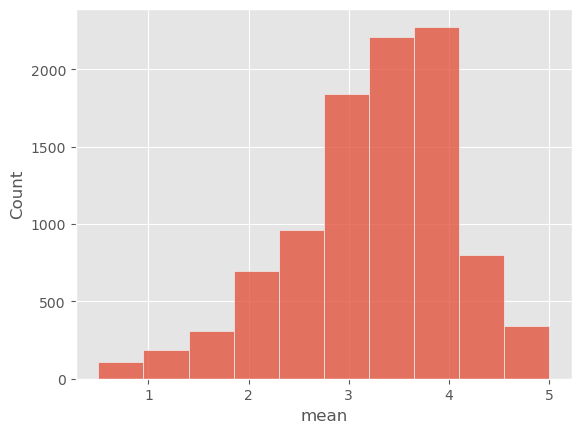

In [39]:
sns.histplot(df_avg_by_title["mean"], bins=10);

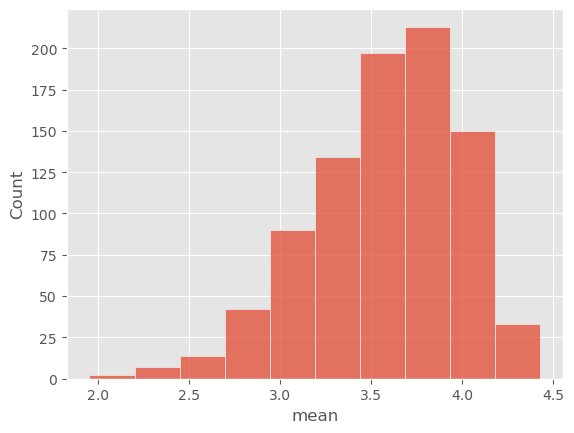

In [40]:
sns.histplot(df_ratings_per_movie_filtered["mean"], bins=10);

- ⭐**Bonus**: Did the average rating of movies improve over time? 

    - Use the `year` that you have extracted in a previous ⭐bonus exercises
    - Visualize your findings in a nice plot
    - Post your plot in slack!

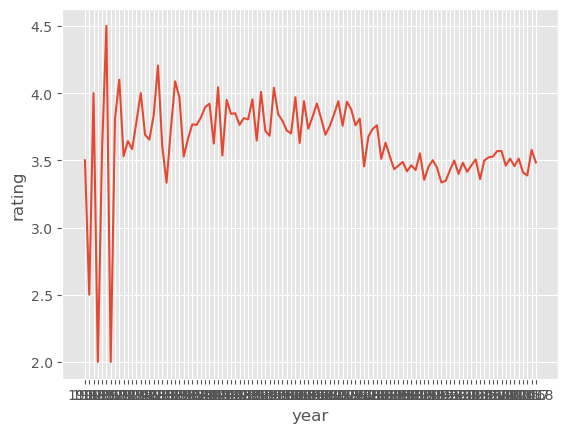

In [41]:
movies_by_year = df.groupby("year")[["rating"]].mean()
movies_by_year

sns.lineplot(movies_by_year["rating"]);